# Medway's Parliamentary Constituencies


### Links

Medway's Parliamentary Constituencies  
https://www.medwayelects.co.uk/?page=constituencies

In [73]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 4.9 MB/s eta 0:00:0000:0100:01


In [74]:
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx
import numpy as np
import pandas as pd

In [10]:
medway_constituencies = {
    "Chatham and Aylesford",
    "Gillingham and Rainham",
    "Rochester and Strood"
}


In [ ]:
# Download boundary data (76MB)
# !wget -P ./data https://boundarycommissionforengland.independent.gov.uk/wp-content/uploads/2023/06/232597_2023_06_27_Final_recommendations_England_gpkg.zip


In [11]:
# Constituencies
path_constituencies = 'data/2023_06_27_Final_recommendations_England.gpkg'

gdf_cons = (
    gpd.read_file(path_constituencies)
    .rename(columns={'Constituen':'Constituency', 'Designatio':'Designation'})
    .to_crs(epsg=4326)
    .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

gdf_cons

/opt/conda/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '2023_06_27_Final_recommendations_England.gpkg': '2023_07_01_Final_recommendations_England' (default), '2023_06_27_Final_recommendations_England'. Specify layer parameter to avoid this warning.
  result = read_func(


,ID,Constituency,Electorate,Designation,Region,Area km2,Density,Sub region,geometry
347,350,Rochester and Strood,72155,County Constituency,South East,208.90,345.40,Kent,"MULTIPOLYGON Z (((0.42603 51.37803 0, 0.4263 5..."
348,351,Chatham and Aylesford,74840,County Constituency,South East,56.27,1330.02,Kent,"MULTIPOLYGON Z (((0.43084 51.29803 0, 0.43085 ..."
349,352,Gillingham and Rainham,73951,Borough Constituency,South East,41.80,1769.16,Kent,"MULTIPOLYGON Z (((0.6306 51.36091 0, 0.63029 5..."


In [12]:
# Wards
path_wards = 'data/Medway_wards.geojson'
gdf_wards = (
    gpd.read_file(path_wards)    
    # .to_crs(epsg=4326)
    # .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

gdf_wards.head()

,OBJECTID,Name,Ward_name,No_of_coun,Current_el,Forecast_e,SHAPE_Leng,SHAPE_Area,geometry
0,1,Fort Horsted,Fort Horsted,1,3426,3653,7692.183021,2.098186e+06,"POLYGON ((0.49705 51.36034, 0.49733 51.3603, 0..."
1,2,Rainham South East,Rainham South East,3,10678,11376,11682.055510,5.605590e+06,"POLYGON ((0.61556 51.36184, 0.61655 51.36165, ..."
2,3,Lordswood & Walderslade,Lordswood & Walderslade,3,11342,11954,16858.727262,6.744457e+06,"POLYGON ((0.54855 51.36459, 0.54862 51.36453, ..."
3,4,Princes Park,Princes Park,2,6807,7085,7820.077862,1.634136e+06,"POLYGON ((0.54797 51.36585, 0.54805 51.36583, ..."
4,5,Hempstead & Wigmore,Hempstead & Wigmore,2,7628,8156,13225.376909,4.504709e+06,"POLYGON ((0.55855 51.3671, 0.55856 51.36709, 0..."


In [56]:
# Polling District
path_os = 'data/bdline_gpkg_gb/Data/bdline_gb.gpkg'
gdf_polling_districts =(
    gpd.read_file(path_os, layer='polling_districts_england')
    .loc[lambda _df: _df['Distric_Bo'] == 'Medway (B)']
    .to_crs(epsg=4326)
)

gdf_polling_districts.tail(20)

,PD_ID,County,Distric_Bo,Ward,Parish,geometry
17056,RSR8,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.49013 51.42585, 0.49136 51.4..."
17057,RSR7,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.49963 51.42538, 0.49974 51.4..."
17058,RSR4,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.50389 51.40388, 0.50402 51.4..."
17059,RSR5,None,Medway (B),Strood Rural Ward,Frindsbury Extra CP,"MULTIPOLYGON (((0.5161 51.40511, 0.51612 51.40..."
17060,RRW2,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.4562 51.36876, 0.45788 51.36..."
17061,RRW5,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.48676 51.38029, 0.48715 51.3..."
17063,RRW3,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.48939 51.3718, 0.48981 51.37..."
17064,RRW4,None,Medway (B),Rochester West & Borstal Ward,None,"MULTIPOLYGON (((0.49599 51.3774, 0.49687 51.37..."
17065,RCH3,None,Medway (B),"Cuxton, Halling & Riverside Ward",Halling CP,"MULTIPOLYGON (((0.43475 51.35693, 0.435 51.357..."
17066,RCH4,None,Medway (B),"Cuxton, Halling & Riverside Ward",Halling CP,"MULTIPOLYGON (((0.39956 51.34801, 0.39983 51.3..."


In [54]:
# gdf_polling_districts.boundary.plot()
gdf_polling_districts.head(20)

,PD_ID,County,Distric_Bo,Ward,Parish,geometry
10560,GW3,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((577745.098 166923.498, 577817...."
10568,GW1,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((578006.301 167927.8, 578025.00..."
10592,GGS1,None,Medway (B),Watling Ward,None,"MULTIPOLYGON (((577915.103 168149.097, 577939...."
16138,CLC1,None,Medway (B),Lordswood & Walderslade Ward,None,"MULTIPOLYGON (((576745.5 163111.799, 576746.10..."
16317,CLC2,None,Medway (B),Lordswood & Walderslade Ward,None,"MULTIPOLYGON (((576803.8 162636.095, 576804.30..."
16331,RRE2,None,Medway (B),Rochester East & Warren Wood Ward,None,"MULTIPOLYGON (((574097.78 167110.444, 574100.7..."
16336,RRE1,None,Medway (B),Rochester East & Warren Wood Ward,None,"MULTIPOLYGON (((574205.097 167741.904, 574207...."
16341,CCC1,None,Medway (B),Fort Pitt Ward,None,"MULTIPOLYGON (((574826.998 167444.099, 574843...."
16361,CCC3,None,Medway (B),Chatham Central & Brompton Ward,None,"MULTIPOLYGON (((575433.397 165867.6, 575433.86..."
16605,CCC2,None,Medway (B),Chatham Central & Brompton Ward,None,"MULTIPOLYGON (((575653.73 167726.498, 575661.8..."


In [14]:
# Polling Stations
df_polling_stations = pd.read_csv('data/polling_stations_2024.csv')

gdf_polling_stations = gpd.GeoDataFrame(
    df_polling_stations, 
    geometry=gpd.points_from_xy(df_polling_stations['longitude'], df_polling_stations['latitude']), crs="EPSG:4326"
)
    
gdf_polling_stations

,Description of people entitled to vote,POLLING DISTRICT,POLLING STATION,STATION NO.,constituancy,latitude,longitude,geometry
0,1-1503,CCB4,"New Road school, Bryant Street, ME4 5QN",1,Chatham and Aylesford,51.378226,0.531410,POINT (0.53141 51.37823)
1,1-1195,CCB5,"Church hall, St Paul with All Saints Church, M...",2,Chatham and Aylesford,51.369392,0.532264,POINT (0.53226 51.36939)
2,1-3828,CCB6,"White Road Community Centre, Keyes Avenue, ME4...",3,Chatham and Aylesford,51.370917,0.528182,POINT (0.52818 51.37092)
3,1-542,CFH1,"Meeting Room, Rogallo Place, Pilots View, Chat...",4,Chatham and Aylesford,51.381917,0.526559,POINT (0.52656 51.38192)
4,1-2873,CFH2,"Davis Estate Community Centre, Barberry Avenue...",5,Chatham and Aylesford,51.353310,0.513821,POINT (0.51382 51.35331)
...,...,...,...,...,...,...,...,...
108,1-1586,RSR8,"Frindsbury Baptist Church, 12-14 Cooling Road,...",93,Rochester and Strood,51.406943,0.499957,POINT (0.49996 51.40694)
109,1-2361,RSW1,"St Francis of Assisi Church, Galahad Avenue, M...",94,Rochester and Strood,51.393031,0.474634,POINT (0.47463 51.39303)
110,1-1687,RSW2,"38th and 40th Strood Sea Scout Hall, Dart Clos...",95,Rochester and Strood,51.393980,0.482870,POINT (0.48287 51.39398)
111,1-2307,RSW3,"Woodside Community Centre, Chestnut Road, ME2 2LH",96,Rochester and Strood,51.390049,0.472936,POINT (0.47294 51.39005)


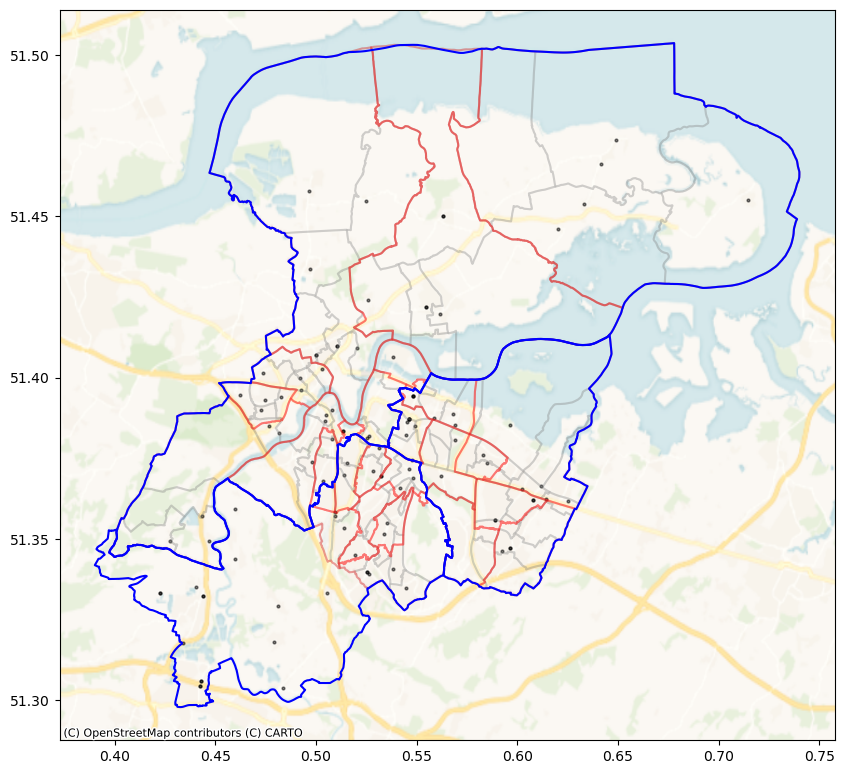

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_polling_districts.boundary.plot(ax=ax, color='grey', alpha=.2)
gdf_wards.boundary.plot(ax=ax, color='red', alpha=.3)
gdf_cons.boundary.plot(ax=ax, color='blue')


gdf_polling_stations.plot(ax=ax, color='black', markersize=4, alpha=.5)

# cx.add_basemap(ax,crs=medway_cons.crs, source=cx.providers.CartoDB.Positron)
cx.add_basemap(ax,crs=gdf_cons.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

In [26]:
# gdf_polling_stations.groupby(['POLLING STATION'])['POLLING STATION'].count().shape
gdf_polling_stations.shape

(113, 8)